In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#загрузка данных

data = pd.read_csv('carmpgdat.csv', sep='\s+')

hp = data['HP']
mpg = data['MPG'].reshape(-1, 1)
hp = hp.reshape(-1, 1)
hp = np.hstack((np.ones((data.shape[0], 1)), hp))
print(hp.shape)

(82, 2)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


## Задание 1

##### a)

In [17]:


linreg = LinearRegression(normalize=True)
linreg.fit(hp, mpg)
predict = linreg.predict(hp)

rmse = abs(mse(mpg, predict)) ** 0.5

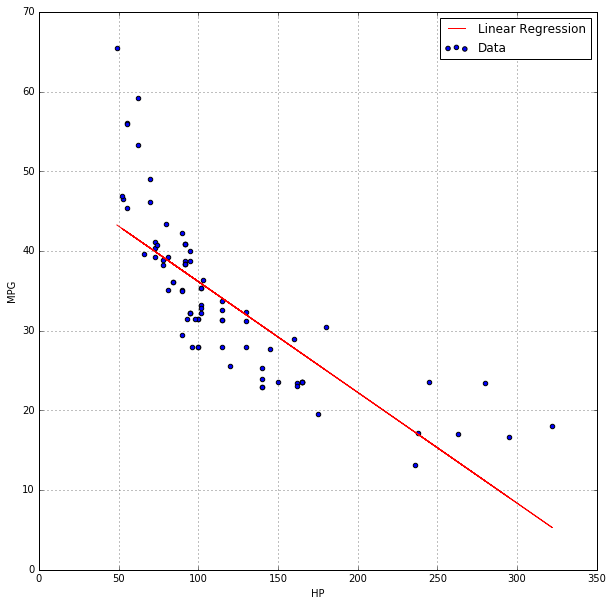


SE = 3049.4351111695155


RMSE = 6.098215563838562



In [156]:
plt.figure(figsize=(10, 10))


plt.plot(hp[:, 1], predict, color='red', label='Linear Regression')
plt.scatter(hp[:, 1], mpg, label='Data')
plt.grid()
plt.xlabel('HP')
plt.ylabel('MPG')
plt.legend()
plt.show()


se = np.square(predict - mpg).sum()
print('\nSE = {}\n'.format(se))
print('\nRMSE = {}\n'.format(rmse))

Несмотря на то что значение RMSE не очень большое, видно, что зависимость не совсем линейная.

##### b)

In [157]:
linreg = LinearRegression(normalize=True)
linreg.fit(hp, np.log(mpg))
predict = linreg.predict(hp)

rmse = abs(mse(mpg, np.exp(predict))) ** 0.5

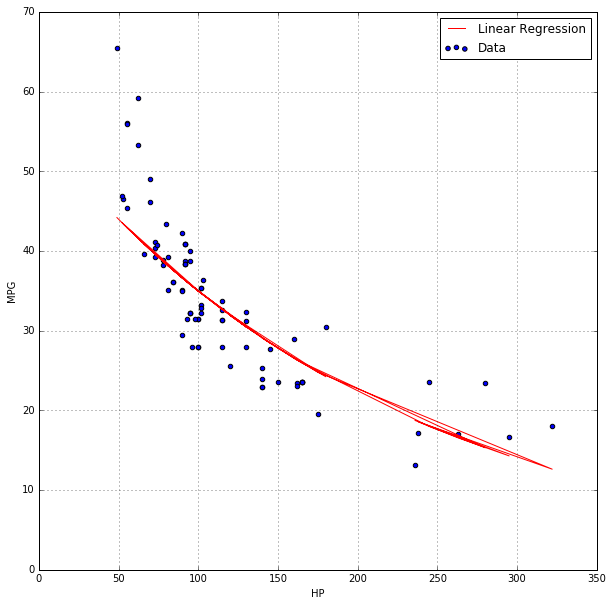


SE = 2378.3626748662637


RMSE = 5.385575444112052



In [162]:
plt.figure(figsize=(10, 10))

plt.plot(hp[:, 1], np.exp(predict), color='red', label='Linear Regression')
plt.scatter(hp[:, 1], mpg, label='Data')
plt.grid()
plt.xlabel('HP')
plt.ylabel('MPG')
plt.legend()
plt.show()

se = np.square(np.exp(predict) - mpg).sum()
print('\nSE = {}\n'.format(se))
print('\nRMSE = {}\n'.format(rmse))

По графику видно, что log(MPG) лучше восстанавливает зависимость. Значение суммы квадратов остатков уменьшилось и средняя ошибка тоже.

##### с)

In [42]:
X = data.drop(['MAKE_MODEL', 'MPG'], axis=1)
X = X.values
print(X.shape)
y = data['MPG'].values.reshape(-1, 1)
X = np.hstack((np.ones((y.shape[0], 1)), X))

(82, 4)


In [43]:
linreg = LinearRegression(normalize=True)
linreg.fit(X, y)
predict = linreg.predict(X)

rmse = abs(mse(y, predict)) ** 0.5
se_c = np.square(predict - y).sum()
print('\nSE = {}\n'.format(se_c))
print('\nRMSE = {}\n'.format(rmse))


SE = 1027.3814772548628


RMSE = 3.539638739412132



SE и RMSE значительно уменьшились, то есть добавленные три признака внесли значительный вклад.

##### d)

Прямой порядок

In [51]:
def linear_prediction(X, y):
    linreg = LinearRegression(normalize=True)
    linreg.fit(X, y)
    predict = linreg.predict(X)
    return predict
def Cp(X, y, sigma):
    predict = linear_prediction(X, y)
    return np.square(y - predict).sum() + 2 * X.shape[1] * sigma

In [75]:
X = np.ones((y.size, 1))
sigma = se_c / y.size
headers = []
all_features = data.drop(['MAKE_MODEL', 'MPG'], axis=1).values
all_headers = list(data.drop(['MAKE_MODEL', 'MPG'], axis=1).columns.values)
y = data['MPG'].values.reshape(-1, 1)
min_cp = Cp(X, y, sigma)

while 1:
    feat_tmp = []
    for i in range(len(all_features[0])):
        feat_tmp.append(Cp(np.hstack((X, all_features[:, i].reshape((y.size, 1)))), y, sigma))
    if min(feat_tmp) < min_cp:
        min_cp = min(feat_tmp)
        index = np.argmin(feat_tmp)
        X = np.hstack((X, all_features[:, index].reshape((y.size, 1))))
        headers.append(all_headers[index])
        all_headers = all_headers[: index] + all_headers[index + 1:]
        np.delete(all_features, index, 1)
    else:
        break
predict = linear_prediction(X, y)
print('Features = {}'.format(headers))
print('Best Cp = {}'.format(min_cp))
print('SE = {}'.format(np.square(predict - y).sum()))
print('RMSE = {}'.format(abs(mse(y, predict)) ** 0.5))

Features = ['WT', 'SP', 'HP']
Best Cp = 1133.8822776636648
SE = 1033.649938419288
RMSE = 3.5504206868896193


Осталось всего три признака, удалили VOL. SE, RMSE не улучшились.

посчитаем для обратного порядка

In [90]:
X = np.hstack((np.ones((y.size, 1)), data.drop(['MAKE_MODEL', 'MPG'], axis=1).values))

all_features = data.drop(['MAKE_MODEL', 'MPG'], axis=1).values
all_headers = list(data.drop(['MAKE_MODEL', 'MPG'], axis=1).columns.values)
y = data['MPG'].values.reshape(-1, 1)
min_cp = Cp(X, y, sigma)
sigma = se_c / y.size
while 1:
    feat_tmp = []
    for i in range(len(all_features[0])):
        feat_tmp.append(Cp(np.delete(X, i + 1, 1), y, sigma))
    
    if min(feat_tmp) < min_cp:
        min_cp = min(feat_tmp)
        index = np.argmin(feat_tmp)
        X = np.delete(X, index + 1, 1)
        all_headers = all_headers[: index] + all_headers[index + 1:]
        all_features = np.delete(all_features, index, 1)
    else:
        break
predict = linear_prediction(X, y)

print('Features = {}'.format(all_headers))
print('Best Cp = {}'.format(min_cp))
print('SE = {}'.format(np.square(predict - y).sum()))
print('RMSE = {}'.format(abs(mse(y, predict)) ** 0.5))

Features = ['HP', 'SP', 'WT']
Best Cp = 1133.8822776636657
SE = 1033.649938419289
RMSE = 3.550420686889621


SE, RMSE не изменились 

### Задание 2

$\mathbf{Условие:}$

$y = \sum_{j = 1}^k \beta_j x_j + \varepsilon$

$\varepsilon \sim \mathcal{N}(0, \sigma^2)$

Показать: $\left(\text{AIC} \to \max\right) \Leftrightarrow \left(\text{Mallow } C_p \to \min\right)$

$\mathbf{Доказательство:}$

$L = \prod_{i=1} ^ {n}f(X_i, Y_i) = \prod_{i=1}^{n}f_X(X_i) \times \prod_{i=1}^{n}f_{X|Y}(X_i|Y_i) = L1 \times L2$.

Так как $\prod_{i=1}^{n}f_X(X_i)$ не зависит от $\beta$, значит, достаточно рассмотреть $L_2 = \prod_{i=1}^{n}f_{X|Y}(X_i|Y_i)$.



$Y_i = \sum_{j=1}^{k}X_{ij} \beta_j + \varepsilon$, т.к. $\varepsilon \tilde{} N{(0,\sigma^2)}$, то $Y \tilde{} N(\sum_{j=1}^{k}X_{ij} \beta_j, \sigma^2)$.

$L_2 = \frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}}\exp\left(-\frac{1}{2\sigma^2}\sum_{i = 1}^n(y_i - \sum_{j=1}^{k}X_{ij} \beta_j)^2\right) \Rightarrow  \ln{L_2} = - \frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i = 1}^n(y_i - \sum_{j=1}^{k}X_{ij} \beta_j)^2$.

$AIC = \ln{L} = \ln{L1} + \ln{L2} = \ln{L1}  - \frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i = 1}^n(y_i - \sum_{j=1}^{k}X_{ij} \beta_j)^2 - k$, так как выбрали k признаков из n.

$C_p = \sum_{i=1}^{n}{(Y_i - \sum_{j=1}^{k}X_{ij} \beta_j)}^2 + 2k \cdot \sigma^2 \rightarrow min$.

Чтобы максимизировать значение AIC по множеству регрессоров, надо минимизировать $\frac{1}{2\sigma^2}\sum_{i = 1}^n(y_i - \sum_{j=1}^{k}X_{ij} \beta_j)^2 + k \rightarrow min$,

так как при домножении на константу точка, множество, на котором достигается минимум, не изменится $\Rightarrow \sum_{i = 1}^n(y_i - \sum_{j=1}^{k}X_{ij} \beta_j)^2 + 2k \sigma^2 \rightarrow min$ . Получили $C_p$. Ч.т.д.

### Задание 3

$\mathbf{a)}$

$X_1,\ldots,X_n \sim \mathcal{N}(\theta, 1)$

$H_0 : \theta = 0$ vs $H_1 : \theta \not = 0$

$AIC_0 = l_X(0)$

$AIC_1 = l_X(\hat\theta) - 1$

$J_n = \left\{\begin{aligned}
& 0, \text{ if AIC}_0 > AIC_1,\\
& 1, \text{ if AIC}_1 > AIC_0
\end{aligned}\right.$

$\mathbf{M_0 - верная:}$

$\lim\limits_{n \to \infty}P(J_n = 0) = \lim\limits_{n \to \infty}P(AIC_0 > AIC_1) = \lim\limits_{n \to \infty}P(l_n(0) - l_n(\theta) + 1 > 0) = \lim\limits_{n \to \infty}P(-\sum_{i=1}^n {(X_i)}^2 + \sum_{i=1}^n {(X_i - \theta)}^2) = \lim\limits_{n \to \infty}P(-2\sum_{i=1}^n {(X_i)} \cdot \overline{X} + {(\overline{X})}^2 + 2 > 0) = \lim\limits_{n \to \infty}P(-2n {\overline{X}}^2 + n {\overline{X}}^2 + 2 > 0) = \lim\limits_{n \to \infty}P({\overline{X}}^2 < \dfrac{2}{n}) = \lim\limits_{n \to \infty}P(-\sqrt{2} < \sqrt{n} \cdot \overline{X} < \sqrt{2}) = \Phi(\sqrt{2}) - \Phi(-\sqrt{2}) = 2\Phi(\sqrt{2}) - 1$,

т.к. по ЦПТ, $\sqrt{n}(\overline{x} - 0)\rightarrow N(0, 1) $

$\mathbf{M_0 - неверная:}$

$\lim\limits_{n \to \infty}P(J_n = 0) = \lim\limits_{n \to \infty}P\left(\left|\overline{X}\right| < \sqrt{\dfrac{2}{n}}\right) = \lim\limits_{n \to \infty}P\left(\sqrt{2} - \sqrt{n}\theta < (\overline{X} - \theta)\sqrt{n} < \sqrt{2} - \sqrt{n} \theta \right) =$

По ЦПТ:

$=\lim\limits_{n \to \infty}\Phi(\sqrt{2} - \sqrt{n} \theta) - 1 + \Phi(\sqrt{2} + \sqrt{n}\theta) = 0 - 1 + 1 = 0$

$\mathbf{b)}$

$\mathbf{Условие:}$

$\hat{f}_n(x) = \left\{\begin{aligned}
& \phi_0(x), \text{ if } J_n = 0 \\
& \phi_{\hat\theta}(x), \text{ if } J_n = 1
\end{aligned}\right.$

$D(f, g) = \int\limits_{\mathbb{R}} f(x)\log\left(\frac{f(x)}{g(x)}\right)dx$

Надо показать, что $\lim\limits_{n \to \infty} P(|D(\phi_0, \hat{f}_n(x)) - 0| \ge \varepsilon) \rightarrow 0, n \rightarrow \infty$

$\mathbf{Доказательство:}$

$\theta = 0;$

Рассмотрим $P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon):$

$P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon) = P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 0) \cdot P(J_n = 0) + P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \cdot P(J_n = 1)$

При $J_n = 0$:

$D(\phi_0, \hat{f}_n(x)) = \int\limits_{\mathbb{R}} \phi_0(x)\log\left(\dfrac{\phi_0(x)}{\phi_0(x)}\right)dx = 0,$

$\lim\limits_{n \to \infty} P(J_n = 0) = 2\Phi(\sqrt(2)) - 1 \Rightarrow$

$\Rightarrow$

$P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon) = P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \cdot P(J_n = 1) = P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \cdot (1 - P(J_n = 0)) = P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \cdot (-2\Phi(\sqrt{2})).$

Посчитаем интеграл:

$D\left(\phi_0, \hat{f}_n(x)\right) = \int\limits_{\mathbb{R}} \phi_0(x)\log\left(\frac{\phi_0(x)}{\phi_{\overline{X}}(x)}\right)dx = \int_{\mathbb{R}} \frac{\exp\left(-\frac{(x)^2}{2}\right)}{\sqrt{2\pi}}\log\left(\frac{\exp\left(-\frac{(x)^2}{2}\right)}{\exp\left(-\frac{(x - \overline{X})^2}{2}\right)}\right) dx = \int_{\mathbb{R}}\frac{\exp\left(-\frac{(x)^2}{2}\right)}{\sqrt{2\pi}} \cdot \frac{\left(x - \overline{X}\right)^2 - \left(x\right)^2}{2} dx = $
$= \int_{\mathbb{R}}\left(\frac{\exp\left(-\frac{(x)^2}{2}\right)}{\sqrt{2\pi}} \cdot \frac{\left(\left(\overline{X}\right)^2\right) + 2x(\overline{X})}{2}\right)dx 
=\frac{\left(\overline{X}\right)^2}{2}\int_{\mathbb{R}}\frac{\exp\left(-\frac{(x)^2}{2}\right)}{\sqrt{2\pi}}dx + 0 = \dfrac{{\overline{X}}^2}{2} > 0 \Rightarrow P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) = P(\dfrac{{\overline{X}}^2}{2} \ge \varepsilon)\le \dfrac{\mathbb{E}{(\dfrac{{\overline{X}}^2}{2}})}{\varepsilon} (неравенство Маркова) = $
$= \dfrac{1}{2n^2} \mathbb{E}({\overline{X}}^2) = \dfrac{1}{2n^2} \left(\mathbb{D}\overline{X} + {(\mathbb{E}(\overline{X}))}^2\right) = \dfrac{1}{2n^2} (\dfrac{1}{n^2} \cdot n \mathbb{D}X_1 + 0) = \dfrac{1}{2n^3} \mathbb{D}X_1 = \dfrac{1}{2n^3} \rightarrow 0, n \rightarrow \infty \Rightarrow P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \rightarrow 0, n \rightarrow \infty \Rightarrow P(\left|D\left(\phi_0, \hat{f}_n(x)\right)\right| \ge \varepsilon) \rightarrow 0, n \rightarrow \infty$

Ч.т.д.

$\theta \neq 0;$

$P(\left|D\left(\phi_\theta, \hat{f}_n(x)\right)\right| \ge \varepsilon) = P(\left|D\left(\phi_\theta, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 0) \cdot P(J_n = 0) + P(\left|D\left(\phi_\theta, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \cdot P(J_n = 1)$

Так как в данном случае $\lim\limits_{n \to \infty} P(J_n = 0) = 0,$

то:

$P(\left|D\left(\phi_\theta, \hat{f}_n(x)\right)\right| \ge \varepsilon) = P(\left|D\left(\phi_\theta, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \cdot P(J_n = 1) = P(\left|D\left(\phi_\theta, \hat{f}_n(x)\right)\right| \ge \varepsilon | J_n = 1) \cdot 1 = \int\limits_{\mathbb{R}} \phi_\theta(x)\log\left(\frac{\phi_\theta(x)}{\phi_{\overline{X}}(x)}\right)dx = \int_{\mathbb{R}} \frac{\exp\left(-\frac{(x - \theta)^2}{2}\right)}{\sqrt{2\pi}}\log\left(\frac{\exp\left(-\frac{(x - \theta)^2}{2}\right)}{\exp\left(-\frac{(x - \overline{X})^2}{2}\right)}\right) dx = \int_{\mathbb{R}}\frac{\exp\left(-\frac{(x - \theta)^2}{2}\right)}{\sqrt{2\pi}} \cdot \frac{\left(x - \overline{X}\right)^2 - \left(x - \theta\right)^2}{2} dx = $
$= \int_{\mathbb{R}}\left(\frac{\exp\left(-\frac{(x - \theta)^2}{2}\right)}{\sqrt{2\pi}} \cdot \frac{\left(\left(\overline{X}\right)^2 -\theta^2\right) + 2x(\theta - \overline{X})}{2}\right)dx 
=\frac{\left(\overline{X}\right)^2 -\theta^2}{2}\int_{\mathbb{R}}\frac{\exp\left(-\frac{(x - \theta)^2}{2}\right)}{\sqrt{2\pi}}dx + (\theta - \overline{X})\int_{\mathbb{R}}x\frac{\exp\left(-\frac{(x - \theta)^2}{2}\right)}{\sqrt{2\pi}}dx = - \dfrac{(\theta^2 - {\overline{X}}^2)}{2} + (\theta - \overline{X})\theta + \dfrac{(\theta - \overline{X})}{2\sqrt{2 \pi}} \cdot \int\limits_{\mathbb{R}} \exp({-\dfrac{(x - \theta)^2}{2}})d(x - \theta)^2 = \dfrac{1}{2}(\theta - \overline{X})^2 \rightarrow 0, n \rightarrow \infty $ (ЗБЧ)

Ч.т.д.